Домашнє завдання

Завдання, що пропонуються, необхідно оформити у вигляді одного jupyter ноутбука.

Завдання 1

У цьому завданні вам потрібно завантажити ось цей датасет. Тут ви знайдете 2 файли - з двовимірним датасетом та датасетом mnist. Для кожного з них застосуйте алгоритм K-means для кластеризації. Щоб знайти оптимальну кількість кластерів, скористайтесь ліктевим методом.

Завдання 2

Візуалізуйте результат роботи кластеризації. Для випадку з mnist датасетом, вам потрібно ще скористатись алгоритмом PCA щоб зменшити розмірність вашим даних до 2-вимірного варіанту.

Завдання 1



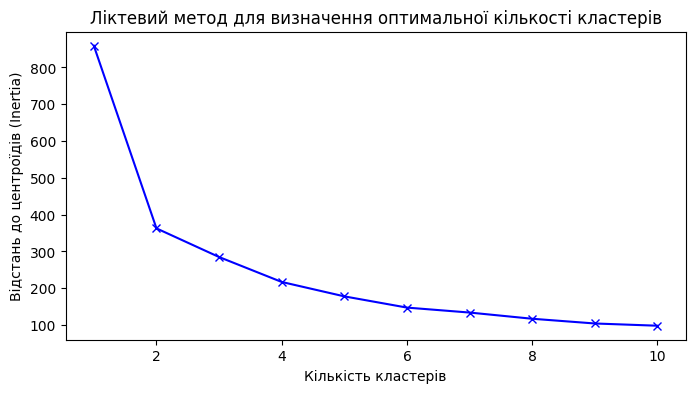

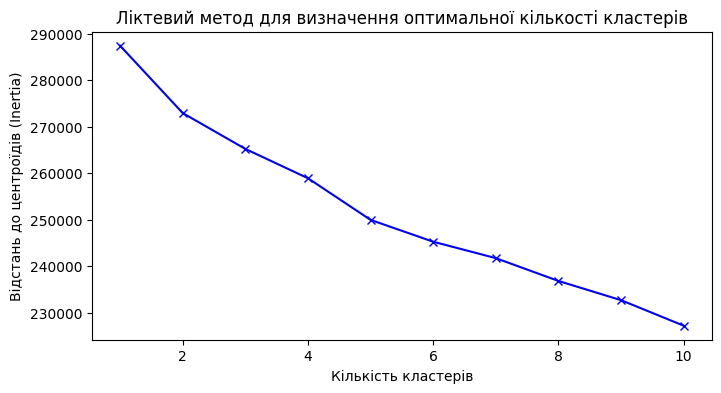

Завдання 2



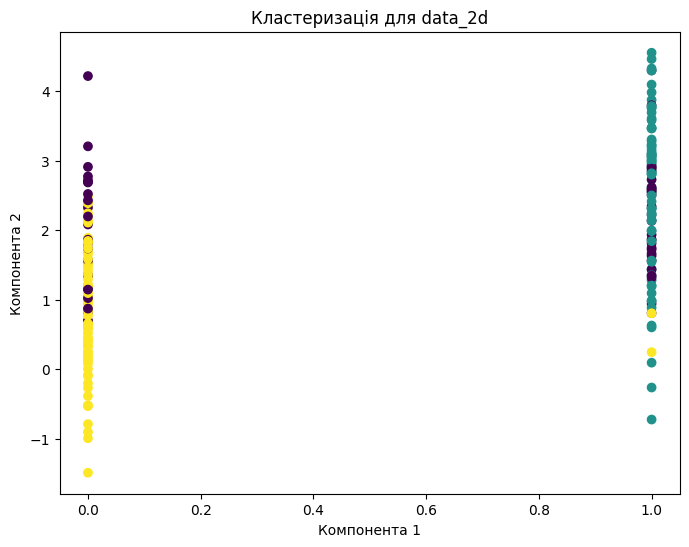

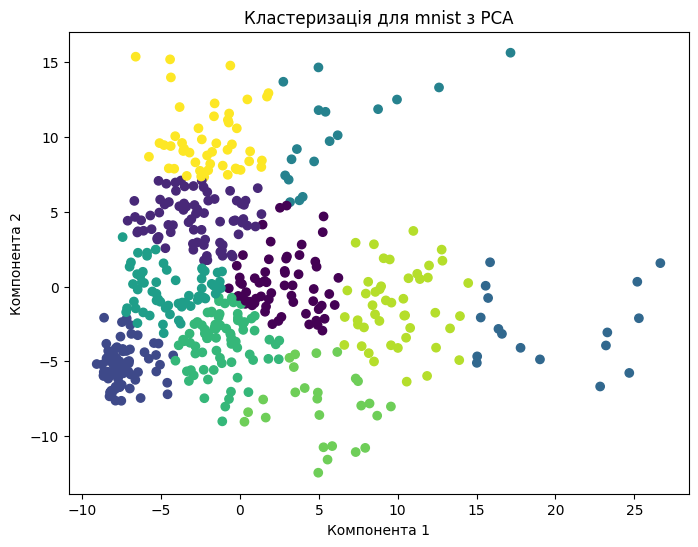

In [1]:
# Імпортуємо необхідні бібліотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print ('Завдання 1\n')

#Завантаження датасетів
data_2d = pd.read_csv('data_2d.csv')
mnist = pd.read_csv('mnist.csv')

# Функція для застосування K-means та використання ліктевого методу
def apply_kmeans(data):
    distortions = []
    K = range(1, 11)
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        distortions.append(kmeans.inertia_)
    
    # Побудова графіку для ліктевого методу
    plt.figure(figsize=(8, 4))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Кількість кластерів')
    plt.ylabel('Відстань до центроїдів (Inertia)')
    plt.title('Ліктевий метод для визначення оптимальної кількості кластерів')
    plt.show()

# Застосування K-means до data_2d
apply_kmeans(data_2d)

# Стандартизація даних для mnist
scaler = StandardScaler()
mnist_scaled = scaler.fit_transform(mnist)

# Застосування K-means до mnist
apply_kmeans(mnist_scaled)

print('Завдання 2\n')

# Візуалізація результатів кластеризації

# Функція для візуалізації кластеризації
def visualize_clusters(data, labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
    plt.title(title)
    plt.xlabel('Компонента 1')
    plt.ylabel('Компонента 2')
    plt.show()

# Візуалізація для data_2d
optimal_k_2d = 3  # Припустимо, що оптимальна кількість кластерів 3, на основі ліктевого методу
kmeans_2d = KMeans(n_clusters=optimal_k_2d, random_state=42)
data_2d['cluster'] = kmeans_2d.fit_predict(data_2d)

visualize_clusters(data_2d.values, data_2d['cluster'], 'Кластеризація для data_2d')

# PCA для mnist
pca = PCA(n_components=2)
mnist_pca = pca.fit_transform(mnist_scaled)

optimal_k_mnist = 10  # Припустимо, що оптимальна кількість кластерів 10, на основі ліктевого методу
kmeans_mnist = KMeans(n_clusters=optimal_k_mnist, random_state=42)
mnist_pca_clusters = kmeans_mnist.fit_predict(mnist_pca)

visualize_clusters(mnist_pca, mnist_pca_clusters, 'Кластеризація для mnist з PCA')